## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


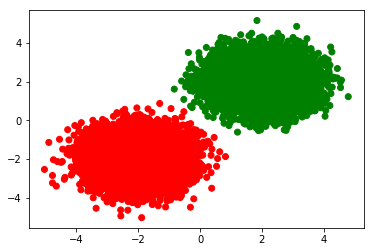

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [41]:
print(labels)

[array([0., 0., 0., ..., 0., 0., 0.])
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-1.7870142614441171, -1.9794312696087122, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                   ord couleur
0      -1.7870142614441171   -1.9794312696087122     red
1      -2.9240662726368267   -1.0630553588844107     red
2      -1.6056245023514115    -1.016858461820723     red
3      -0.8340427693422352   -0.7232524532373457     red
4       -2.034470074767397    -2.085510145129715     red
5      -1.4500191940599911   -0.7385695221752675     red
6        -1.28520494740271    -1.307807780387424     red
7      -2.4292698157123107   -1.7658673823747617     red
8      -1.0350380618746482   -2.8580120488659553     red
9       -1.966729365310164   -0.7128700759518485     red
10     -1.9100930842037314   -0.6973563368782554     red
11     -1.7879866877236579    -2.137755739129522     red
12     -2.5792187070931254    -2.515280443906287     red
13     -1.7078947536249116    -3.364094868796382     red
14     -2.1693707055031406   -2.5535036178164052     red
15     -1.4928726901282965   -2.3684570175238426     red
16     -2.1105012294070074    -2.588787857665945     red
17      -2.762544998203455   -1.7831736855772542     red
18     -2.0928606969991495   -2.9444100080529516     red
19     -1.4455037447681318   -2.9693027897166644     red
20     -1.7001339158612927    -1.141912554381145     red
21     -0.8840925905689272   -2.2211709653339287     red
22     -0.7195515128903844    -2.132745187030563     red
23     -1.7957754557761492  -0.37190919482769447     red
24      -3.469928744986122   -1.1530266221462244     red
25      -2.734005053902868    -2.721120949384918     red
26      -2.089403190897026   -1.4398753448072432     red
27      -3.751967951909264   -0.6408955713289801     red
28      -3.254267591161767   -3.0947933089869433     red
29      -1.404179526822888   -2.6730789972813387     red
...                    ...                   ...     ...
19970   2.0540973169882584    1.8862921123066618   green
19971   2.4847733615619765    1.8671255001735931   green
19972   2.1878534060359196     2.317965767858537   green
19973   3.0184926279466677    2.2753508121211223   green
19974    2.113609299190828     1.507573811175245   green
19975  0.48734621471700135     2.656426405155993   green
19976    1.847130450475181    1.3764051861137496   green
19977    3.057032558931306     2.099699717048663   green
19978   1.5352945057799219     2.908989633953044   green
19979   0.3496408788855925    1.4465930555042215   green
19980   1.3416497558355087    1.8535102763370093   green
19981   0.7990560109117446    2.7249730246473147   green
19982   1.2052168632411062     1.471318109475539   green
19983    2.169645646630722     2.420167266275799   green
19984   2.4009064527338797    1.9835439343125632   green
19985   2.4719862724311223    1.4748997145660803   green
19986    1.703609019988874     2.744228983323377   green
19987   1.6810662853359597    2.6422441701710624   green
19988    1.056120295886164     1.874977356281236   green
19989    2.850704688983317    1.8871347893169308   green
19990    2.454541144068894     2.525692453883142   green
19991    1.896346222018233     2.233076958036645   green
19992    2.054416196775869    0.9919155389886298   green
19993    2.584229431975352     1.308934208959194   green
19994   2.2851895721673188     2.339116658085586   green
19995    1.780878712982501     2.808143600230783   green
19996    2.353588908346822    1.7658875206095122   green
19997    2.155735812790503     1.454522734130736   green
19998   2.8545195710661297     1.062549815706566   green
19999   2.4013627158265054     2.097196711205132   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.10021045 0.8997895 ]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 93us/sample - loss: 0.1276 - acc: 0.9592 - val_loss: 0.0267 - val_acc: 1.0000
Epoch 2/10
16000/16000 [==============================] - 1s 84us/sample - loss: 0.0164 - acc: 1.0000 - val_loss: 0.0151 - val_acc: 1.0000
Epoch 3/10
16000/16000 [==============================] - 1s 84us/sample - loss: 0.0106 - acc: 1.0000 - val_loss: 0.0109 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 1s 88us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 1s 89us/sample - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

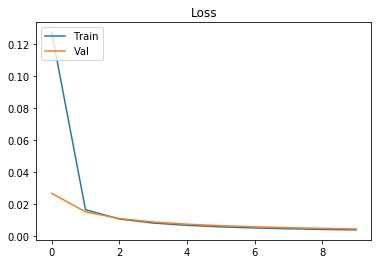

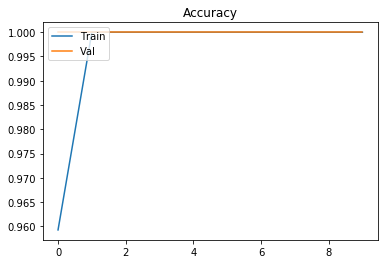

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[7.0299400e-04 9.9929702e-01]
 [9.9955016e-01 4.4975377e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5556314  0.44436866]
 [0.37581152 0.62418854]
 [0.22475292 0.7752471 ]]


['darkred', 'chartreuse', 'chartreuse']

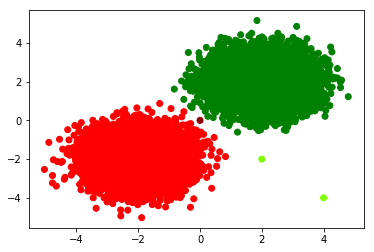

In [17]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [18]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 507us/sample - loss: 5.7656e-04 - acc: 1.0000
Test Loss 0.0005765602691099048
Test Accuracy 1.0


In [ ]:
abs_r = np.random.normal(-2,0.75,1200)
ord_r = np.random.normal(-2,0.75,1200)
labels_r = np.zeros(1200)
abs_g = np.random.normal(2,0.75,800)
ord_g = np.random.normal(2,0.75,800)
labels_g = np.zeros(800) + 1
datas_test_abs = list([abs_r, abs_g])
datas_test_abs = np.array(datas_test_abs).ravel()
datas_test_ord = list([ord_r, ord_g])
datas_test_ord = np.array(datas_test_ord).ravel()
c = ["red","green"]
labels = []
for i in range(2000):
    if i <1200:
        labels.append(0)
        else:
            labels.append(1)


In [ ]:
colors = [c[i] for i in labels]

[[7.0299400e-04 9.9929702e-01]
 [9.9955016e-01 4.4975377e-04]]


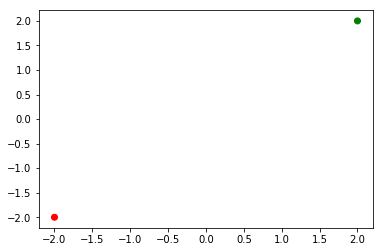

In [21]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

In [ ]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [ ]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [ ]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [ ]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

## Résumé du modèle (couches de neurones)

In [ ]:
model.summary()

## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [ ]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

## Le modèle est-il bien entraîné ?

In [ ]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [ ]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [ ]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

In [ ]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant